In [2]:
#IMPORTS
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf


print(os.listdir())

['diffuse,direct paper critcisms.docx', '.diffuse_direct_fitting 8.ipynb.icloud', '.Data_viz.ipynb.icloud', 'diffuse_direct_fitting 9.ipynb', 'Untitled1.ipynb', '.DS_Store', 'testing_df.csv', 'psm_2017.xlsx', 'Untitled.ipynb', 'testing_df', 'psm_2018.csv', '.Data_viz 2.ipynb.icloud', '.diffuse_direct_fitting 3.ipynb.icloud', '.diffuse_direct_fitting 4.ipynb.icloud', 'data_munger.ipynb', 'Untitled2.ipynb', '.diffuse_direct_fitting 5.ipynb.icloud', '.diffuse_direct_fitting.ipynb.icloud', 'output.csv', 'Data_Files', 'diffuse_direct_fitting 2.ipynb', '.diffuse_direct_fitting 7.ipynb.icloud', 'diffuse_direct_dit.py', 'psm_2016.csv', 'psm_2015.csv', 'output_darksky_2015.csv', '.diffuse_direct_fitting 6.ipynb.icloud', '.ipynb_checkpoints']


In [3]:
#SEE SHAPE OF DATA
training_file = pd.read_excel('psm_2017.xlsx')
print(training_file.columns)

Index(['Source', 'Location ID', 'City', 'State', 'Country', 'Latitude',
       'Longitude', 'Time Zone', 'Elevation', 'Local Time Zone',
       'Clearsky DHI Units', 'Clearsky DNI Units', 'Clearsky GHI Units',
       'Dew Point Units', 'DHI Units', 'DNI Units', 'GHI Units',
       'Solar Zenith Angle Units', 'Temperature Units', 'Pressure Units',
       'Relative Humidity Units', 'Precipitable Water Units',
       'Wind Direction Units', 'Wind Speed', 'Cloud Type -15', 'Cloud Type 0',
       'Cloud Type 1', 'Cloud Type 2', 'Cloud Type 3', 'Cloud Type 4',
       'Cloud Type 5', 'Cloud Type 6', 'Cloud Type 7', 'Cloud Type 8',
       'Cloud Type 9', 'Cloud Type 10', 'Cloud Type 11', 'Cloud Type 12',
       'Fill Flag 0', 'Fill Flag 1', 'Fill Flag 2', 'Fill Flag 3',
       'Fill Flag 4', 'Fill Flag 5', 'Surface Albedo Units', 'Version'],
      dtype='object')


# Data Exploration

In [4]:
#GET LOCATION INFO
training_file_source = (training_file['Source'][0])
training_file_location_ID = (training_file['Location ID'][0])
training_file_longitude = training_file['Longitude'][0]
training_file_latitude = training_file['Latitude'][0]

print("Source :", training_file_source)
print("Location ID :", training_file_location_ID)
print("Lat, Long : ",training_file_latitude, training_file_longitude,)

Source : NSRDB
Location ID : 629434
Lat, Long :  43.85 -99.5


In [5]:
#EXTRACT THE COLUMNS WE CARE ABOUT
#del(training_file)
training_df = pd.read_excel('psm_2017.xlsx', skiprows=2)
training_df = training_df[['DHI', 'DNI', 'GHI','Cloud Type']]
print(training_df)


      DHI  DNI  GHI  Cloud Type
0       0    0    0           1
1       0    0    0           1
2       0    0    0           1
3       0    0    0           1
4       0    0    0           1
...   ...  ...  ...         ...
8755   70  923  418           0
8756   62  884  344           0
8757   49  786  222           0
8758   27  541   75           1
8759    0    0    0           8

[8760 rows x 4 columns]


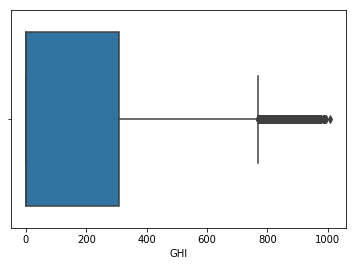

In [6]:
#We care about DHI and GHI
#Global Horizontal (GHI) = Direct Normal (DNI) X cos(θ) + Diffuse Horizontal (DHI)
#Explore Data
sns.boxplot(x=training_df['GHI'])

In [7]:
#Some outliers, see which ones are too much
#Z score of 3
z = np.abs(stats.zscore(training_df['GHI']))
print(z)
outliers = np.where(z > 2)
print(len(outliers[0]))

[0.68157098 0.68157098 0.68157098 ... 0.15672536 0.39836276 0.68157098]
646


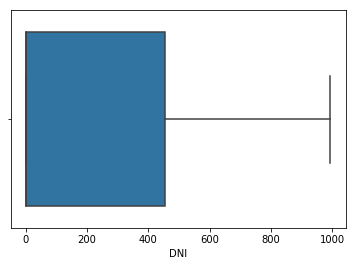

In [8]:
#646 samples are above two standard deviations, or 7% of all samples
#Lets check out DNI 
sns.boxplot(x=training_df['DNI'])

In [9]:
z = np.abs(stats.zscore(training_df['DNI']))
print(z)
outliers = np.where(z > 2)
print(len(outliers[0]))

[0.68135486 0.68135486 0.68135486 ... 1.74481022 0.98856284 0.68135486]
503


In [10]:
#Similair level here, lets plot both in a scatter plot

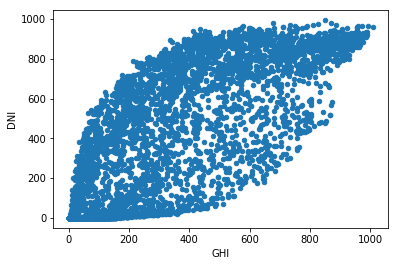

In [11]:
ax1 = training_df.plot.scatter(x='GHI', y='DNI')

# Linear Regression

In [12]:
#Here there is a relationship between GHI and DNI
#Max variability occurs with mid range GHI values
#this is consistent with data from last paper
#Can we fit a line here? 


In [13]:
X = training_df['GHI'].values.reshape(-1,1) #reshape as numpy array
Y = training_df['DNI'].values.reshape(-1,1)
print(X)
print(Y)
print(len(X))
print(len(Y))
#Verify both are same length

[[  0]
 [  0]
 [  0]
 ...
 [222]
 [ 75]
 [  0]]
[[  0]
 [  0]
 [  0]
 ...
 [786]
 [541]
 [  0]]
8760
8760


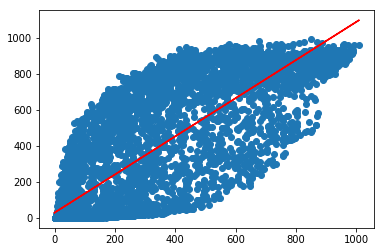

[29.19028396]
[[1.06122801]]


In [14]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#Visualize
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print(linear_regressor.intercept_)
print(linear_regressor.coef_)
# sns.pairplot(training_df, x_vars=['GHI'], y_vars=['DNI'], kind='reg')

In [15]:
#R^2 value
#R-Squared = 
#Explained variance of the model / Total variance of the target variable
r2=linear_regressor.score(X,Y)
v = np.var(Y)
print('The rsquared value is: ' + str(r2))
print('Variance of target val (Y) is: ',str(v))

The rsquared value is: 0.7525300010848707
Variance of target val (Y) is:  104955.30468813203


In [16]:
#I am skeptical about trying to remove outliers
#Lets evaluate this

In [17]:
#Use new library to recreate model
lm2 = smf.ols(formula='DNI ~ GHI', data=training_df).fit()
lm2.params

Intercept    29.190284
GHI           1.061228
dtype: float64

In [18]:
#Same model, now lets see p values
lm2.pvalues

Intercept    4.251024e-44
GHI          0.000000e+00
dtype: float64

In [19]:
#Represents the probability that the coefficient is actually zero
#Basically, according to this model, there is definetley a relationship
#Between GHI and DNI

In [20]:
#Use some common metrics
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
#Mean Squared Error (MSE) is the mean of the squared errors:
#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
#Normalized RMSE
# define true and predicted response values

# calculate MAE, MSE, RMSE, NRMSE
print(metrics.mean_absolute_error(Y, Y_pred))
print(metrics.mean_squared_error(Y, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y, Y_pred)))
print(np.sqrt(metrics.mean_squared_error(Y, Y_pred))/(max(Y)-min(Y)))


107.53304791096544
25973.289137309104
161.1623068130669
[0.16213512]


In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    for i in y_true:
        if i ==0:
            i+=1
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print(mean_absolute_percentage_error(Y, Y_pred))

2097.4255910155134


# Testing with Another data set, from 2018

In [22]:
#Some sample tests, huge variance in results
samples = np.asarray([100, 400, 600, 1000])

samples = samples.reshape(-1,1)
print(linear_regressor.predict(samples))


[[ 135.31308468]
 [ 453.68148684]
 [ 665.92708828]
 [1090.41829116]]


In [23]:
#Error is high as expected
#Mean erro is off by 107.533 W/m^2
#16% for normalized error
#now lets use data from another year: 2018
testing_df = pd.read_csv('psm_2018.csv', skiprows=2)
testing_df = testing_df[['Clearsky DHI', 'Clearsky DNI', 'DHI', 'DNI', 'GHI']]
print(testing_df)

      Clearsky DHI  Clearsky DNI  DHI  DNI  GHI
0                0             0    0    0    0
1                0             0    0    0    0
2                0             0    0    0    0
3                0             0    0    0    0
4                0             0    0    0    0
...            ...           ...  ...  ...  ...
8755            60           892  101  569  316
8756            52           859   89  525  257
8757            41           770   69  385  154
8758            26           537   33  191   50
8759             0             0    0    0    0

[8760 rows x 5 columns]


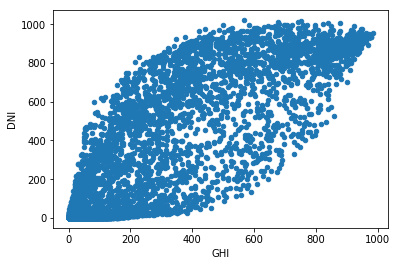

In [24]:
#See data
ax2 = testing_df.plot.scatter(x='GHI', y='DNI')

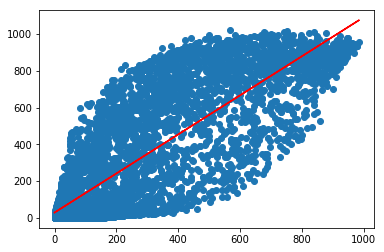

In [25]:
#Make testing
Xt = testing_df['GHI'].values.reshape(-1,1) #reshape as numpy array
Yt = testing_df['DNI'].values.reshape(-1,1)
Yt_pred = linear_regressor.predict(Xt)  # make predictions
#Visualize
plt.scatter(Xt, Yt)
plt.plot(Xt, Yt_pred, color='red')
plt.show()

In [26]:
#R^2 value
#R-Squared = 
#Explained variance of the model / Total variance of the target variable
r2=linear_regressor.score(Xt,Yt)
v = np.var(Yt)
print('The rsquared value is: ' + str(r2))
print('Variance of target val (Y) is: ',str(v))

The rsquared value is: 0.7803349046085343
Variance of target val (Y) is:  101852.51210951344


In [27]:
#Use some common metrics
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
#Mean Squared Error (MSE) is the mean of the squared errors:
#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
#Normalized RMSE
# define true and predicted response values

# calculate MAE, MSE, RMSE, NRMSE
print(metrics.mean_absolute_error(Yt, Yt_pred))
print(metrics.mean_squared_error(Yt, Yt_pred))
print(np.sqrt(metrics.mean_squared_error(Yt, Yt_pred)))
print(np.sqrt(metrics.mean_squared_error(Yt, Yt_pred))/(max(Yt)-min(Yt)))

98.73721893269347
22373.441788396685
149.57754439887253
[0.14650102]


In [28]:
#OKAY BACK TO THE ORIGINAL DATA

# Explore GHI vs. DHI

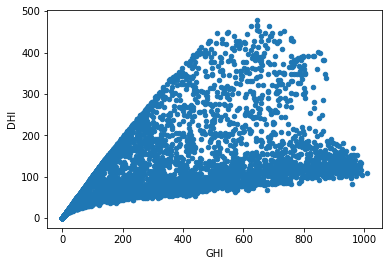

In [29]:
#Explore GHI vs. DHI
ax1 = training_df.plot.scatter(x='GHI', y='DHI')

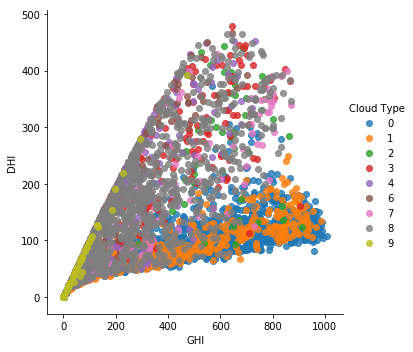

In [30]:
#Let's see what the cloud coverage is
training_GHI = training_df['GHI'].values
training_DHI = training_df['DHI'].values
training_cloud = training_df['Cloud Type'].values
sns.lmplot('GHI', 'DHI', data=training_df, hue='Cloud Type', fit_reg=False)
plt.show()

In [31]:
#Fit a line, but maybe not OLS because it assumes population all come from constant variance
#Use weighted least squares

X = training_df['GHI'].values.reshape(-1,1) #reshape as numpy array
Y_dhi = training_df['DHI'].values.reshape(-1,1)
print(X)
print(Y)
print(len(X))
print(len(Y))
#Verify both are same length

[[  0]
 [  0]
 [  0]
 ...
 [222]
 [ 75]
 [  0]]
[[  1]
 [  1]
 [  1]
 ...
 [786]
 [541]
 [  1]]
8760
8760


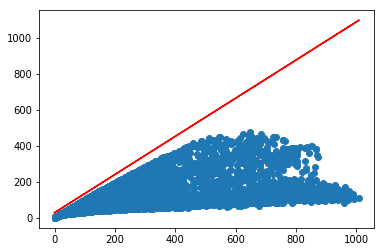

[17.3951552]
[[0.23953426]]


In [32]:
linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(X, Y_dhi)  # perform linear regression
Y_pred_dhi = linear_regressor.predict(X)  # make predictions
#Visualize
plt.scatter(X, Y_dhi)
plt.plot(X, Y_pred_dhi, color='red')
plt.show()
print(linear_regressor2.intercept_)
print(linear_regressor2.coef_)
# sns.pairplot(training_df, x_vars=['GHI'], y_vars=['DNI'], kind='reg')

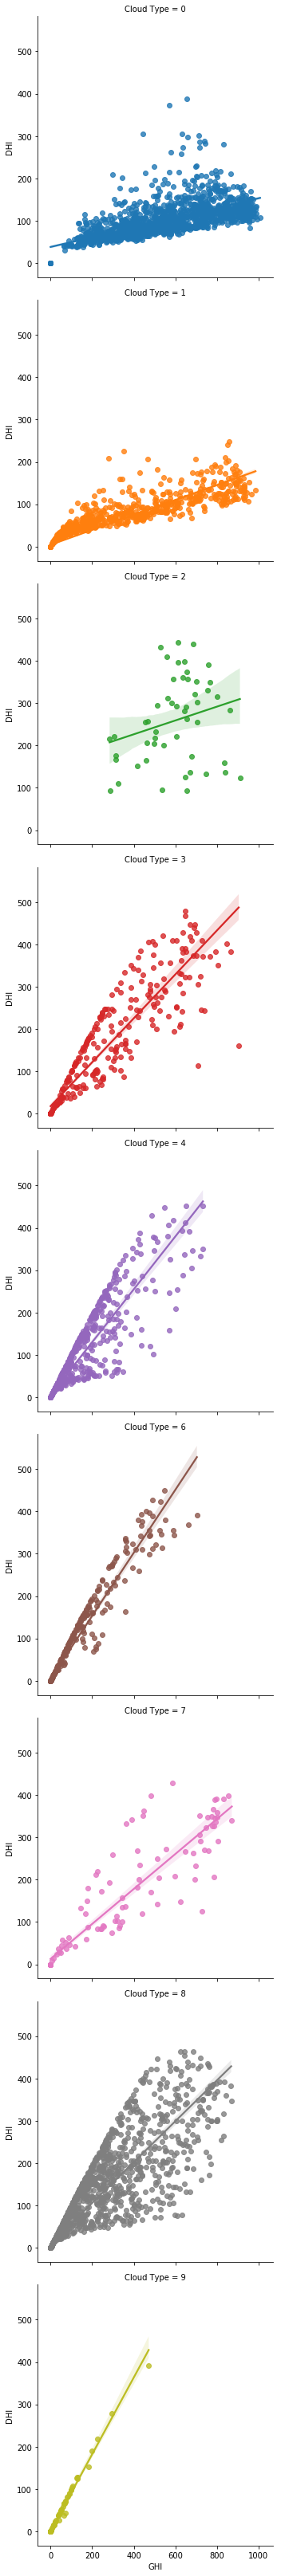

In [33]:
#Look at regressions when controlling for cloud cover
training_GHI = training_df['GHI'].values
training_DHI = training_df['DHI'].values
training_cloud = training_df['Cloud Type'].values
sns.lmplot(x='GHI', y='DHI', data=training_df, hue='Cloud Type', row="Cloud Type", fit_reg=True)
plt.show()

In [34]:
#could work?

Cloud Type 8 is heteroskedastic
type 4 large error
type 3 heteroskedastic
1 & 2 may be possible
type 3 has large error
lets see what happens

In [35]:
#not worried about multicollinearity, clouds are distinct on each day, therefore no anova or ancova

Because NRSDB data is updated 1/2 times a year, we need to frankentstein the data together with readily avaliable darksky data. Train data on NRSDB + Darksky, predict on USCRN + Darksky


In [36]:
#So now, get ready to pull some darksky data

## Retraining on DarkSky and NRSDB data

In [37]:
#8760 hours in a year

In [38]:
#So dependant upon cloud type. What about seasonality? 
#Cloud cover is more important. Seasonality inluences GHI (but we know this)
#Cloud cover influences DNI


In [39]:
######DATA MUNGING########
"""Approach
1. get darksky dictionary of timestamp:cloud cover
2. make df from same year data
3. create column of timestamps from datetime in df
4. loop through each timestamp, pull out val from cloud cover dict, put in new array, 
    if key not found, supply with 0
5. add new array as colummn in df
"""

'Approach\n1. get darksky dictionary of timestamp:cloud cover\n2. make df from same year data\n3. create column of timestamps from datetime in df\n4. loop through each timestamp, pull out val from cloud cover dict, put in new array, \n    if key not found, supply with 0\n5. add new array as colummn in df\n'

Darksky request

In [44]:
import requests
"""Darksky time machine request
https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]
key: 31dac4830187f562147a946529516a8d

params: year,lat,lon,
returns: cloud cover percentage

"""
#Exclude minutely, currently, daily, alerts
key='31dac4830187f562147a946529516a8d'
def getDarkSkyCloudCoverForYear(year, lat, lon, key, units='si'):
    cloudCoverByHour = {}
    coords = '%0.2f,%0.2f' % (lat, lon)
    times = list(pd.date_range('{}-01-01'.format(year), '{}-12-31'.format(year), freq='D'))
    while times:
        time = times.pop(0)
        print(time)
        url = 'https://api.darksky.net/forecast/%s/%s,%s?exclude=daily,alerts,minutely,currently&units=%s' % (key, coords, time.isoformat(), units ) 
        res = requests.get(url).json()
        try:
            dayData = res['hourly']['data']
        except KeyError:
            pass
        for hour in dayData:
            try:
                cloudCoverByHour[hour['time']] = hour['cloudCover']
            except KeyError:
                pass
    return cloudCoverByHour

cloudsForTheYear = getDarkSkyCloudCoverForYear(2018, 43.85, -99.5, key)
print(cloudsForTheYear)
# cloudCoverForTheYear = getDarkSkyYear(2018, 43.85, -99.5, key)
# print(cloudCoverForTheYear)

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-06 00:00:00
2018-01-07 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00


In [45]:
print(len(cloudsForTheYear))
print(type(list(cloudsForTheYear.keys())[0]))
print(list(cloudsForTheYear.keys())[0])

8666
<class 'int'>
1514786400


In [46]:
#See the results in a .csv
import csv

w = csv.writer(open("psm_2018_cloud_output_darksky.csv", "w"))
for key, val in cloudsForTheYear.items():
    w.writerow([key, val])
# looks about right

In [43]:
import csv
timelist = []
cloudslist = []
with open('output.csv', newline='') as infile:
    reader = csv.reader(infile, delimiter=',')
    for row in reader:
        timelist.append(int(row[0]))
        cloudslist.append(float(row[1]))

cloudsForTheYear = dict(zip(timelist, cloudslist))
print(cloudsForTheYear)
    

{}


Okay now  for some annoying stuff. I have to loop through the original psm data, find all time stamps and turn them into date time objects. Then for each valid time stamp converted into seconds from 1970. Then using those time second objects, i would access the cloud cover for that time, and append it to the mega data 

In [52]:
df = pd.read_csv('Data_Files/Testing_Data/psm_testing_data2018_copy.csv', skiprows=0)

In [53]:
import datetime
print(df)
print(df.iloc[0]['Year'])
print(len(df))
timestamps = []
for i in range(len(df)):
    year = (int(df.iloc[i]['Year']))
    month = (int(df.iloc[i]['Month']))
    day = (int(df.iloc[i]['Day']))
    hour = (int(df.iloc[i]['Hour']))
    date = datetime.datetime(year, month, day, hour)
    timestamp = datetime.datetime.timestamp(date)
    timestamps.append(timestamp)

    
df['timestamps'] = pd.Series(timestamps, index = df.index)
# df['Cloud Cover'] = pd.Series(timestamps, index = df.index)
# df['Cloud Cover'] = df['Cloud Cover'].astype(int)
df['timestamps'] = df['timestamps'].astype(int)
# df['Cloud Cover'] = pd.Series(np.random.randn(len(df['timestamps'])), index=df.index)
print(df)

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0     2018      1    1     0      30        -22.5             0             0   
1     2018      1    1     1      30        -23.1             0             0   
2     2018      1    1     2      30        -23.6             0             0   
3     2018      1    1     3      30        -23.9             0             0   
4     2018      1    1     4      30        -24.1             0             0   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8755  2018     12   31    19      30        -12.8            60           892   
8756  2018     12   31    20      30        -13.0            52           859   
8757  2018     12   31    21      30        -13.6            41           770   
8758  2018     12   31    22      30        -14.6            26           537   
8759  2018     12   31    23      30        -15.1             0             0   

      Clearsky GHI  Cloud T

In [54]:
#now pull in cloud data
# from statistics import mode
cloudCover = []
# cloudMode = mode(cloudsForTheYear)
# print(cloudMode)
print(len(df['timestamps']))
for i in df['timestamps']:
    try:
        print(i, cloudsForTheYear[i])
#         row = df.loc[i]['timestamps']['Cloud Cover']
#         print(row)
#         row['Cloud Cover'] = cloudsForTheYear[i]
#         df.at[i,'Cloud Cover']= cloudsForTheYear[i]
        cloudCover.append(cloudsForTheYear[i])
    except KeyError:
        cloudCover.append(0.0)
print(len(cloudCover))

8760
1514786400 0
1514790000 0.44
1514793600 1
1514797200 0.75
1514800800 0.44
1514804400 0.19
1514808000 0.75
1514811600 0.75
1514815200 0.44
1514818800 0.44
1514822400 0
1514826000 0
1514829600 0
1514833200 0
1514836800 0
1514840400 0
1514844000 0
1514847600 0
1514851200 0
1514854800 0
1514858400 0
1514862000 0
1514865600 0
1514869200 0
1514872800 0.75
1514876400 1
1514880000 1
1514883600 0.19
1514887200 0
1514890800 0
1514894400 0
1514898000 0
1514901600 0
1514905200 0
1514908800 0
1514912400 0
1514916000 0
1514919600 0
1514923200 0
1514926800 0.75
1514930400 0.75
1514934000 0
1514937600 0
1514941200 0.44
1514944800 0
1514948400 0.75
1514952000 1
1514955600 1
1514959200 1
1514962800 1
1514966400 1
1514970000 1
1514973600 1
1514977200 1
1514980800 1
1514984400 1
1514988000 1
1514991600 1
1514995200 1
1514998800 1
1515002400 0.75
1515006000 1
1515009600 0.75
1515013200 1
1515016800 0.75
1515020400 0
1515024000 0
1515027600 0
1515031200 0
1515034800 0
1515038400 0
1515042000 0
15150456

1517655600 0.75
1517659200 1
1517662800 1
1517666400 1
1517670000 0.75
1517673600 0
1517677200 0
1517680800 0.44
1517684400 0.75
1517688000 1
1517691600 0.75
1517695200 1
1517698800 1
1517702400 1
1517706000 1
1517709600 1
1517713200 1
1517716800 1
1517720400 1
1517724000 1
1517727600 0.75
1517731200 1
1517734800 1
1517738400 1
1517742000 0.44
1517745600 0.75
1517749200 1
1517752800 0.75
1517756400 0.44
1517760000 0.44
1517763600 0.75
1517767200 0
1517770800 0
1517774400 0
1517778000 0
1517781600 0.19
1517785200 0
1517788800 0
1517792400 0
1517796000 0
1517799600 0
1517803200 0
1517806800 0
1517810400 0
1517814000 0
1517817600 0.19
1517821200 1
1517824800 1
1517828400 1
1517832000 1
1517835600 1
1517839200 1
1517842800 1
1517846400 1
1517850000 1
1517853600 1
1517857200 1
1517860800 0.75
1517864400 0
1517868000 0
1517871600 0
1517875200 0
1517878800 0
1517882400 0
1517886000 0
1517889600 0
1517893200 0
1517896800 0
1517900400 0
1517904000 0.44
1517907600 0.75
1517911200 1
1517914800 1


1520355600 1
1520359200 1
1520362800 1
1520366400 1
1520370000 1
1520373600 1
1520377200 1
1520380800 1
1520384400 1
1520388000 1
1520391600 1
1520395200 1
1520398800 1
1520402400 1
1520406000 1
1520409600 1
1520413200 1
1520416800 1
1520420400 0.75
1520424000 0
1520427600 0
1520431200 0
1520434800 0.75
1520438400 0.44
1520442000 0.44
1520445600 0.75
1520449200 0.19
1520452800 0.44
1520456400 0.19
1520460000 0
1520463600 0
1520467200 0
1520470800 0
1520474400 0
1520478000 0
1520481600 0
1520485200 0
1520488800 0
1520492400 0
1520496000 0
1520499600 0
1520503200 0
1520506800 0
1520510400 0
1520514000 0
1520517600 0
1520521200 0
1520524800 0
1520528400 0
1520532000 0
1520535600 0
1520539200 0
1520542800 0
1520546400 0
1520550000 0
1520553600 0
1520557200 0
1520560800 0
1520564400 0.75
1520568000 1
1520571600 1
1520575200 1
1520578800 1
1520582400 0.75
1520586000 1
1520589600 1
1520593200 1
1520596800 1
1520600400 1
1520604000 1
1520607600 0.75
1520611200 0
1520614800 0
1520618400 0
15206

1523224800 1
1523228400 1
1523232000 1
1523235600 1
1523239200 1
1523242800 1
1523246400 1
1523250000 1
1523253600 1
1523257200 1
1523260800 1
1523264400 1
1523268000 1
1523271600 1
1523275200 1
1523278800 1
1523282400 1
1523286000 1
1523289600 1
1523293200 1
1523296800 1
1523300400 1
1523304000 1
1523307600 1
1523311200 1
1523314800 1
1523318400 0.75
1523322000 1
1523325600 0.44
1523329200 0.44
1523332800 0.19
1523336400 0.44
1523340000 0.19
1523343600 0
1523347200 0
1523350800 0.75
1523354400 0.19
1523358000 0
1523361600 0.44
1523365200 0.75
1523368800 0.19
1523372400 0
1523376000 0.75
1523379600 0.44
1523383200 0
1523386800 0
1523390400 0.44
1523394000 0.44
1523397600 0.44
1523401200 0.75
1523404800 0.44
1523408400 0
1523412000 0
1523415600 0
1523422800 0
1523426400 0
1523430000 0
1523433600 0
1523437200 0
1523440800 0
1523444400 0
1523448000 0
1523451600 0
1523455200 0
1523458800 0.44
1523462400 0
1523466000 0
1523469600 0.75
1523473200 0.75
1523476800 0.75
1523480400 0.44
15234840

1526385600 0
1526389200 0
1526392800 0
1526396400 0
1526400000 0.44
1526403600 0.19
1526407200 0.44
1526410800 0.44
1526414400 0.44
1526418000 0.75
1526421600 0.44
1526425200 0.19
1526428800 0.44
1526432400 0
1526436000 0
1526439600 0
1526443200 0
1526446800 0
1526450400 0
1526454000 0.19
1526457600 0.19
1526461200 0
1526464800 0.75
1526468400 0.75
1526472000 0.44
1526475600 0
1526479200 0
1526482800 0
1526486400 0
1526490000 0
1526493600 0
1526497200 0.19
1526500800 0.75
1526504400 0.44
1526508000 0.75
1526511600 0.44
1526515200 0.19
1526518800 0.19
1526522400 0
1526526000 0
1526529600 0.75
1526533200 0.75
1526536800 0.19
1526540400 0.75
1526544000 0.75
1526547600 0.19
1526551200 0.75
1526554800 0.75
1526558400 0.44
1526562000 0.44
1526565600 0.44
1526569200 0.44
1526572800 0.44
1526576400 0
1526580000 0.75
1526583600 0.44
1526587200 0.19
1526590800 0
1526594400 0
1526598000 0
1526601600 0
1526605200 0
1526608800 0
1526612400 0
1526616000 0
1526619600 1
1526623200 1
1526626800 1
15266

1529589600 1
1529593200 1
1529596800 1
1529600400 1
1529604000 0.75
1529607600 0
1529611200 0
1529614800 0.19
1529618400 0.44
1529622000 0.44
1529625600 0.44
1529629200 0.44
1529632800 0.19
1529636400 0
1529640000 0
1529643600 0
1529647200 0
1529650800 0.44
1529654400 0.19
1529658000 0
1529665200 0
1529668800 0
1529672400 0
1529676000 0
1529679600 0
1529686800 0
1529690400 0
1529694000 0.19
1529701200 0.44
1529704800 0.75
1529708400 0.75
1529715600 0
1529719200 0
1529722800 0.19
1529726400 0.19
1529730000 1
1529733600 0.75
1529737200 1
1529740800 1
1529744400 1
1529748000 0.75
1529751600 0.75
1529755200 0.75
1529758800 0.44
1529762400 0
1529766000 0.19
1529769600 0.44
1529776800 0.75
1529780400 0.75
1529784000 0.75
1529787600 0.75
1529791200 0.75
1529794800 0.75
1529798400 1
1529802000 1
1529805600 0
1529809200 0
1529812800 0
1529816400 0
1529820000 0
1529823600 0
1529827200 0
1529830800 0
1529834400 0.44
1529838000 0.44
1529841600 0
1529845200 0
1529848800 0
1529852400 0.75
1529856000

1532638800 0.11
1532642400 0.08
1532646000 0.02
1532649600 0
1532653200 0
1532656800 0
1532660400 0
1532664000 0
1532667600 0
1532671200 0.09
1532674800 0.19
1532678400 0.58
1532682000 0.52
1532685600 0.42
1532689200 0.37
1532692800 0.23
1532696400 0.21
1532700000 0.14
1532703600 0.23
1532707200 0.25
1532710800 0.28
1532714400 0.3
1532718000 0.45
1532721600 0.38
1532725200 0.37
1532728800 0.41
1532732400 0.45
1532736000 0.26
1532739600 0.25
1532743200 0.34
1532746800 0.34
1532750400 0.24
1532754000 0.31
1532757600 0.55
1532761200 0.56
1532764800 0.77
1532768400 0.83
1532772000 0.82
1532775600 0.79
1532779200 0.78
1532782800 0.61
1532786400 0.5
1532790000 0.21
1532793600 0.4
1532797200 0.24
1532800800 0.21
1532804400 0.25
1532808000 0.3
1532811600 0.37
1532815200 0.39
1532818800 0.48
1532822400 0.46
1532826000 0.44
1532829600 0.24
1532833200 0.17
1532836800 0.23
1532840400 0.25
1532844000 0.33
1532847600 0.47
1532851200 0.46
1532854800 0.46
1532858400 0.58
1532862000 0.61
1532865600 0.8

1535572800 0.26
1535576400 0.3
1535580000 0.29
1535583600 0.24
1535587200 0.13
1535590800 0.08
1535594400 0.03
1535598000 0
1535601600 0
1535605200 0
1535608800 0
1535612400 0.01
1535616000 0.01
1535619600 0.01
1535623200 0.01
1535626800 0.01
1535630400 0.01
1535634000 0
1535637600 0
1535641200 0.04
1535644800 0.04
1535648400 0.14
1535652000 0.44
1535655600 0.49
1535659200 0.53
1535662800 0.54
1535666400 0.33
1535670000 0.26
1535673600 0.24
1535677200 0.26
1535680800 0.2
1535684400 0.16
1535688000 0.05
1535691600 0.02
1535695200 0.42
1535698800 0.43
1535702400 0.31
1535706000 0.24
1535709600 0.23
1535713200 0.31
1535716800 0.2
1535720400 0.4
1535724000 0.7
1535727600 0.8
1535731200 0.51
1535734800 0.47
1535738400 0.41
1535742000 0.55
1535745600 0.58
1535749200 0.46
1535752800 0.29
1535756400 0.21
1535760000 0.17
1535763600 0.16
1535767200 0.11
1535770800 0.07
1535774400 0.16
1535778000 0.41
1535781600 0.52
1535785200 0.49
1535788800 0.44
1535792400 0.37
1535796000 0.35
1535799600 0.23


1537779600 0.98
1537783200 1
1537786800 1
1537790400 1
1537794000 1
1537797600 1
1537801200 1
1537804800 0.96
1537808400 0.99
1537812000 1
1537815600 0.96
1537819200 0.89
1537822800 0.83
1537826400 0.79
1537830000 0.85
1537833600 0.73
1537837200 0.68
1537840800 0.77
1537844400 0.7
1537848000 0.79
1537851600 0.87
1537855200 0.93
1537858800 0.96
1537862400 0.97
1537866000 1
1537869600 0.85
1537873200 0.99
1537876800 1
1537880400 1
1537884000 1
1537887600 1
1537891200 0.93
1537894800 0.79
1537898400 0.49
1537902000 0.39
1537905600 0.33
1537909200 0.17
1537912800 0.16
1537916400 0.12
1537920000 0.12
1537923600 0.08
1537927200 0.04
1537930800 0.02
1537934400 0.01
1537938000 0.01
1537941600 0.01
1537945200 0.01
1537948800 0
1537952400 0
1537956000 0
1537959600 0
1537963200 0
1537966800 0
1537970400 0
1537974000 0
1537977600 0
1537981200 0
1537984800 0
1537988400 0.01
1537992000 0.02
1537995600 0.1
1537999200 0.12
1538002800 0.25
1538006400 0.33
1538010000 0.65
1538013600 0.82
1538017200 0.83

1540479600 0.99
1540483200 0.99
1540486800 0.99
1540490400 0.7
1540494000 0.37
1540497600 0.46
1540501200 0.23
1540504800 0.19
1540508400 0.15
1540512000 0.11
1540515600 0.07
1540519200 0.04
1540522800 0.01
1540526400 0
1540530000 0
1540533600 0
1540537200 0.02
1540540800 0.05
1540544400 0.07
1540548000 0.07
1540551600 0.05
1540555200 0.04
1540558800 0.04
1540562400 0.04
1540566000 0.05
1540569600 0.08
1540573200 0.13
1540576800 0.15
1540580400 0.19
1540584000 0.21
1540587600 0.24
1540591200 0.39
1540594800 0.46
1540598400 0.24
1540602000 0.16
1540605600 0.07
1540609200 0
1540612800 0
1540616400 0
1540620000 0
1540623600 0
1540627200 0
1540630800 0
1540634400 0.01
1540638000 0.01
1540641600 0.01
1540645200 0.06
1540648800 0.14
1540652400 0.18
1540656000 0.13
1540659600 0.05
1540663200 0.01
1540666800 0.15
1540670400 0.46
1540674000 0.68
1540677600 0.53
1540681200 0.46
1540684800 0.2
1540688400 0.13
1540692000 0.06
1540695600 0.02
1540699200 0
1540702800 0
1540706400 0.01
1540710000 0
1

1543179600 0.96
1543183200 0.95
1543186800 0.96
1543190400 0.87
1543194000 0.76
1543197600 0.6
1543201200 0.2
1543204800 0.5
1543208400 0.32
1543212000 0.55
1543215600 0.89
1543219200 0.95
1543222800 0.98
1543226400 0.99
1543230000 0.98
1543233600 0.89
1543237200 0.83
1543240800 0.78
1543244400 0.75
1543248000 0.69
1543251600 0.73
1543255200 0.76
1543258800 0.73
1543262400 0.7
1543266000 0.65
1543269600 0.6
1543273200 0.53
1543276800 0.62
1543280400 0.57
1543284000 0.49
1543287600 0.43
1543291200 0.44
1543294800 0.45
1543298400 0.48
1543302000 0.51
1543305600 0.55
1543309200 0.57
1543312800 0.56
1543316400 0.54
1543320000 0.68
1543323600 0.68
1543327200 0.66
1543330800 0.64
1543334400 0.7
1543338000 0.79
1543341600 0.9
1543345200 0.87
1543348800 0.52
1543352400 0.64
1543356000 0.46
1543359600 0.54
1543363200 0.64
1543366800 0.93
1543370400 0.94
1543374000 0.92
1543377600 0.99
1543381200 0.82
1543384800 0.82
1543388400 0.96
1543392000 0.95
1543395600 0.83
1543399200 0.57
1543402800 0.57

In [55]:
print(cloudCover)

[0.0, 0, 0.44, 1, 0.75, 0.44, 0.19, 0.75, 0.75, 0.44, 0.44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 1, 1, 0.19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 0.75, 0, 0, 0.44, 0, 0.75, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.75, 1, 0.75, 1, 0.75, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0.75, 0.44, 0.75, 1, 0.75, 0, 0, 0, 0, 0.44, 0, 0, 0, 0, 0, 0, 0.75, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.44, 0, 0, 0, 0, 0, 0, 0, 0.75, 1, 1, 1, 1, 0.19, 0.19, 0.44, 0.75, 0.75, 0.75, 0.19, 0.75, 1, 1, 0.75, 0.75, 0.44, 0, 0.44, 0, 0, 0.75, 0.19, 0, 0, 0.44, 0.75, 0.75, 1, 1, 1, 1, 0.44, 0, 0.19, 0.19, 0.75, 1, 0.19, 0, 0, 0.44, 0.75, 0.75, 0.19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.44, 0.44, 0.19, 0.75, 0.75, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.75, 0.75, 0.44, 0.75, 0.44, 1, 0.44, 0.44, 0.44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.75

In [56]:
df['Cloud Cover'] = pd.Series(cloudCover, index = df.index)
# print(df['timestamps'])

In [57]:
print(df)

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0     2018      1    1     0      30        -22.5             0             0   
1     2018      1    1     1      30        -23.1             0             0   
2     2018      1    1     2      30        -23.6             0             0   
3     2018      1    1     3      30        -23.9             0             0   
4     2018      1    1     4      30        -24.1             0             0   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8755  2018     12   31    19      30        -12.8            60           892   
8756  2018     12   31    20      30        -13.0            52           859   
8757  2018     12   31    21      30        -13.6            41           770   
8758  2018     12   31    22      30        -14.6            26           537   
8759  2018     12   31    23      30        -15.1             0             0   

      Clearsky GHI  Cloud T

In [58]:
#DATA FINALLY MUNGED TOGETHER!!!!!!

In [59]:
training_df = df[['DHI', 'DNI', 'GHI','Cloud Cover', 'timestamps']]

In [60]:
print(training_df)

      DHI  DNI  GHI  Cloud Cover  timestamps
0       0    0    0         0.00  1514782800
1       0    0    0         0.00  1514786400
2       0    0    0         0.44  1514790000
3       0    0    0         1.00  1514793600
4       0    0    0         0.75  1514797200
...   ...  ...  ...          ...         ...
8755  101  569  316         0.57  1546300800
8756   89  525  257         0.55  1546304400
8757   69  385  154         0.53  1546308000
8758   33  191   50         0.49  1546311600
8759    0    0    0         0.43  1546315200

[8760 rows x 5 columns]


In [61]:
print(set(list(training_df['Cloud Cover'])))

{0.0, 1.0, 0.75, 0.27, 0.26, 0.25, 0.5, 0.51, 0.54, 0.52, 0.84, 0.23, 0.22, 0.21, 0.79, 0.38, 0.63, 0.88, 0.47, 0.72, 0.97, 0.44, 0.19, 0.42, 0.18, 0.43, 0.2, 0.45, 0.46, 0.41, 0.92, 0.76, 0.85, 0.69, 0.94, 0.15, 0.17, 0.16, 0.55, 0.8, 0.14, 0.39, 0.64, 0.89, 0.48, 0.73, 0.98, 0.82, 0.57, 0.13, 0.59, 0.83, 0.67, 0.35, 0.6, 0.68, 0.61, 0.36, 0.12, 0.93, 0.11, 0.77, 0.66, 0.86, 0.7, 0.95, 0.1, 0.09, 0.08, 0.56, 0.81, 0.4, 0.65, 0.9, 0.24, 0.74, 0.49, 0.99, 0.58, 0.06, 0.07, 0.34, 0.29, 0.3, 0.31, 0.32, 0.33, 0.05, 0.04, 0.28, 0.78, 0.53, 0.37, 0.87, 0.62, 0.03, 0.71, 0.96, 0.02, 0.01, 0.91}


In [62]:
#I think we have enough unique values to treat cloud cover as a continuous variable


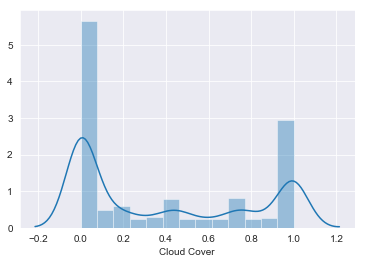

In [63]:
#Histogram of Cloud Cover vals
sns.set_style('darkgrid')
sns.distplot(training_df['Cloud Cover'])

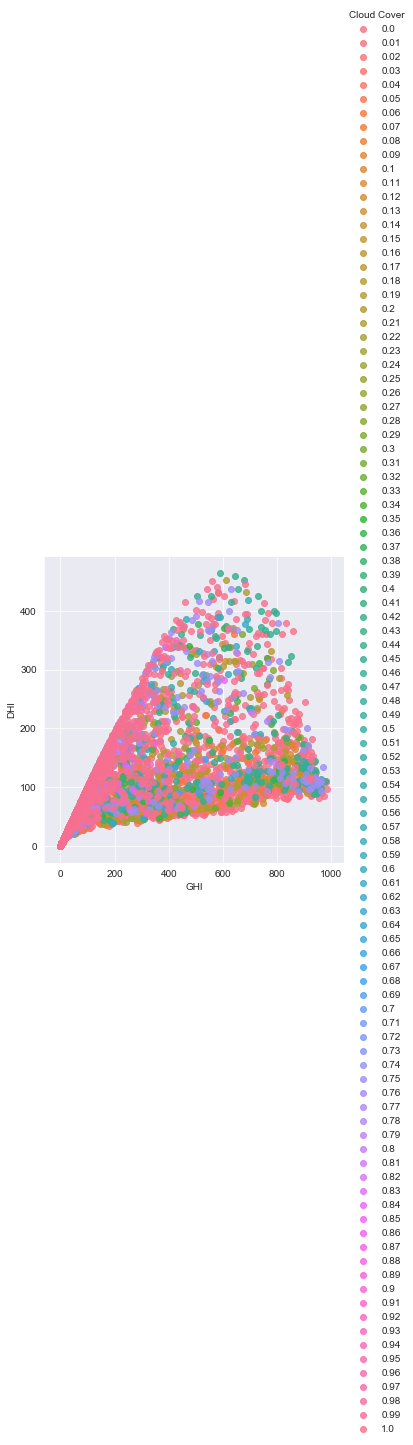

In [64]:
sns.lmplot('GHI', 'DHI', data=training_df, hue='Cloud Cover', fit_reg=False)
plt.show()

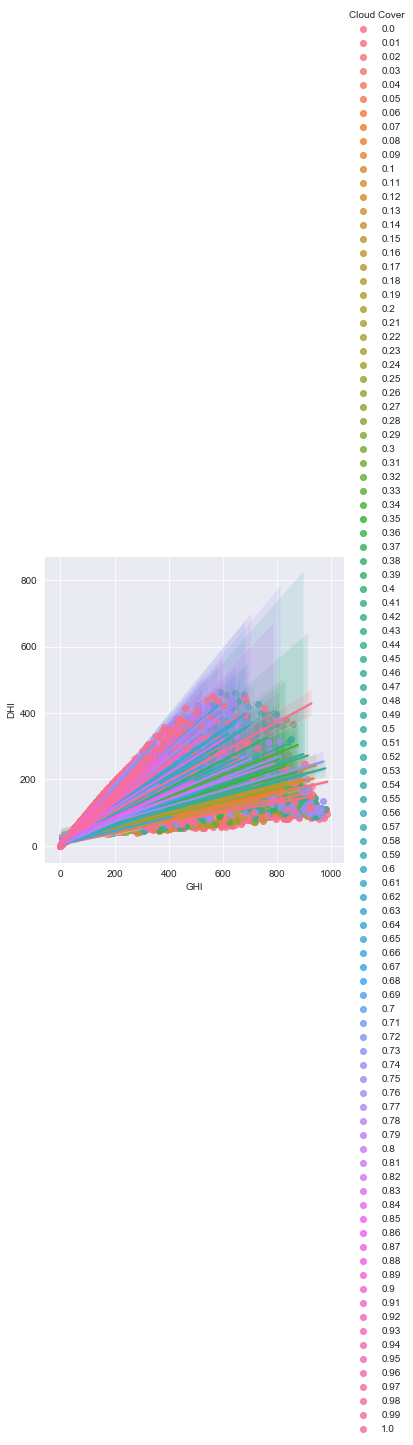

In [65]:
sns.lmplot('GHI', 'DHI', data=training_df, hue='Cloud Cover', fit_reg=True)
plt.show()

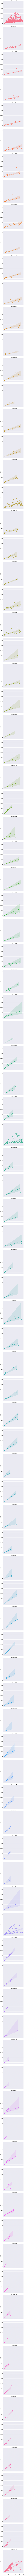

In [66]:
sns.lmplot('GHI', 'DHI', data=training_df, hue='Cloud Cover', row= 'Cloud Cover', fit_reg=True)
plt.show()

In [63]:
#Not super helpful, lets try something else
#Multiple linear regression!!!

from mpl_toolkits import mplot3d


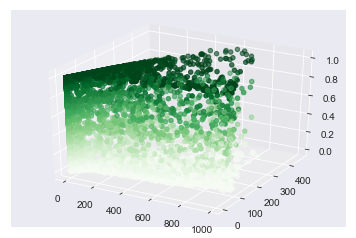

In [64]:

ax = plt.axes(projection='3d')
ax.scatter3D(training_df['GHI'], training_df['DHI'], training_df['Cloud Cover'], c=training_df['Cloud Cover'], cmap='Greens')


In [114]:
from mlr.MLR import MyLinearRegression as mlr

## Linear Regression on the 2018 darksky, NRSDB training data

In [66]:
#GEt data from pandas
feature_cols = ['GHI', 'Cloud Cover']
target_col = 'DHI'

model = mlr()
model.fit_dataframe(X=feature_cols, y=target_col, dataframe=training_df)

In [67]:
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  0.5038297276935964
Adjusted R-squared:  0.5037164080013943
MSE:  3255.9965621984643


In [68]:
model.print_metrics()

sse:     28522529.8849
sst:     57485366.3688
mse:     3255.9966
r^2:     0.5038
adj_r^2: 0.5037
AIC:     95718.9053
BIC:     95740.1391


In [69]:
model.ftest()

(4446.091565405405, 0.0)

In [70]:
#overall regression is statistically significant

In [71]:
print("P-values:",model.pvalues())
print("t-test values:",model.tvalues())
print("Standard errors:",model.std_err())

P-values: [1.60340284e-25 0.00000000e+00 9.52151004e-41]
t-test values: [10.47433519 94.22042772 13.43510595]
Standard errors: [0.95928884 0.0023733  1.49234263]


In [72]:
print(model.conf_int())

[[ 8.16748139 11.92834437]
 [ 0.21896153  0.228266  ]
 [17.12443916 22.97512342]]


In [73]:
#The P values for sure indicate that the feature variables have explanatory power
#But R squared value isnt so good
#MSE is large
#lets run some tests
#HAVE TO DATA MUNGE AGAIN :(

## Test on 2015 NRSDB data

In [74]:
#Get testing df
test_df = pd.read_csv('testing_df.csv')
print(test_df)

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0     2015      1    1     0      30           -9             0             0   
1     2015      1    1     1      30           -9             0             0   
2     2015      1    1     2      30           -9             0             0   
3     2015      1    1     3      30           -9             0             0   
4     2015      1    1     4      30           -9             0             0   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8755  2015     12   31    19      30           -3            91           806   
8756  2015     12   31    20      30           -3            79           762   
8757  2015     12   31    21      30           -3            60           660   
8758  2015     12   31    22      30           -5            30           410   
8759  2015     12   31    23      30           -6             0             0   

      Clearsky GHI  Cloud T

In [76]:
test_input = df.as_matrix(columns = ['GHI', 'Cloud Cover'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [77]:
a = list(test_df['GHI'].values)
b = list(test_df['Cloud Cover'].values)
test_input = list(zip(a, b))
test_input = np.array(test_input)

In [78]:
predictions = model.predict(test_input)

In [79]:
#Sanity check
print(len(predictions))

8760


In [80]:
actuals = test_df['DHI']
MAE = metrics.mean_absolute_error(actuals, predictions)
MSE = metrics.mean_squared_error(actuals, predictions)
r2 = metrics.r2_score(actuals, predictions)
print("MAE is: ", MAE)
print("MSE is ", MSE)
print("r2 is: ",r2)


MAE is:  40.45026150479076
MSE is  4280.852116809265
r2 is:  0.4942055187189046


In [81]:
#If mean average error is 40.45, with a full range of 0 - 400 w/m2. Not bad!!!!
#r2 isnt bad either!

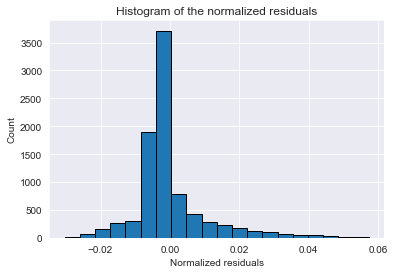

In [82]:
#Check normality of residuals
model.histogram_resid()

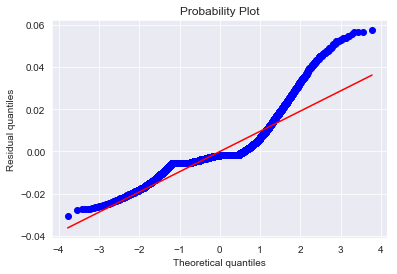

In [83]:
model.qqplot_resid()

In [84]:
# pretty close, but there is a skew at the end
#QQ plot is percentile of the data points. This means that both theoretical and actual quantiles
#come from same distribution and are relatively normally distributed
#good because mlr assumes normal distribution of residuals


In [85]:
import decimal
actuals = (training_df['DHI'])
differences = []
percent_differences = []
for i in range(len(predictions)):
    differences.append(abs(predictions[i]-actuals[i]))
    if actuals[i]==0:
        temp = actuals[i]
        temp+=0.1
        percent_differences.append(((predictions[i])/(temp))*100)
    percent_differences.append((predictions[i]/actuals[i])*100)
print(differences)
print(percent_differences)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


[10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.047912883363182, 0.8340183051579899, 8.291953960793151, 45.25619810842574, 46.34921919858079, 22.472642075581433, 35.113081575623134, 35.58535682153844, 14.55957544088242, 3.286720927391201, 25.08524885291658, 10.047912883363182, 30.097694176101044, 30.097694176101044, 30.097694176101044, 25.08524885291658, 13.857371328983376, 10.047912883363182, 30.097694176101044, 25.08524885291658, 30.097694176101044, 30.097694176101044, 30.097694176101044, 30.097694176101044, 30.097694176101044, 22.240810708903652, 16.968995771056008, 10.777835137656368, 34.096926255724725, 57.37598952618987, 48.177423485217886, 30.83038684592148, 25.769583272230285, 1.1481037686583022, 10.047912883363182, 10.047912883363182, 10.047912883363182, 10.0479128

In [86]:
#Problem with 0 values. Maybe remove them? Because when its 0, means its dark outside 
#and cloud cover is hence uselsss

In [87]:
model1 = model
print(model1)

I am a Linear Regression model!


In [88]:
#Lets try again, lets look at distributions of the data

AxesSubplot(0.125,0.125;0.775x0.755)


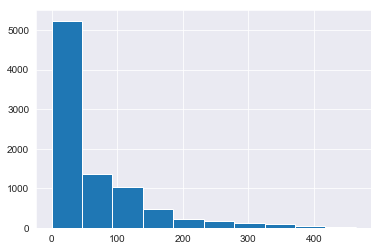

In [67]:
print(training_df['DHI'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


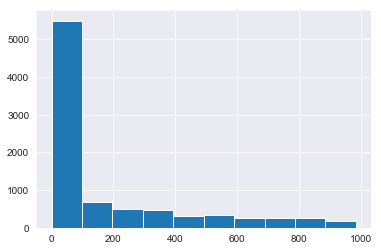

In [68]:
print(training_df['GHI'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


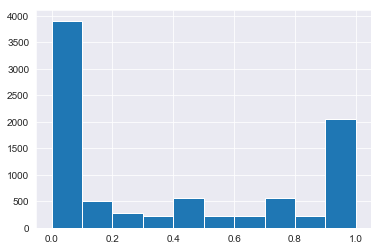

In [69]:
print(training_df['Cloud Cover'].hist())

In [70]:
#Whole lot of 0 values. TBH those aren't a huge use to us. But similair distribution.

In [71]:
#Lets try box cox

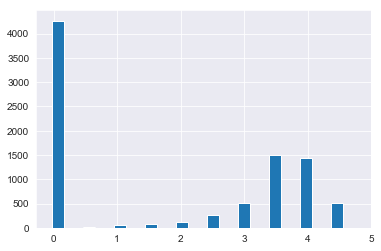

In [94]:
from scipy import stats
dhi_boxcox = stats.boxcox(training_df['DHI']+1)
pd.Series(dhi_boxcox).hist()

In [95]:
#Box cos doesnt seem to work. Sigh lets try removing 0 values

In [72]:
no_zero_training_cols = training_df.loc[training_df['GHI']!= 0 ]
print(no_zero_training_cols)

      DHI  DNI  GHI  Cloud Cover  timestamps
14     12   50   14         0.00  1514833200
15     53  301  106         0.00  1514836800
16     60  742  274         0.00  1514840400
17     64  860  376         0.00  1514844000
18     56  976  440         0.00  1514847600
...   ...  ...  ...          ...         ...
8754   64  812  382         0.61  1546297200
8755  101  569  316         0.57  1546300800
8756   89  525  257         0.55  1546304400
8757   69  385  154         0.53  1546308000
8758   33  191   50         0.49  1546311600

[4494 rows x 5 columns]


In [73]:
for i in no_zero_training_cols['GHI']:
    if i ==0:
        print(i)
#No results, that means whenever DHI is 0 so is GHI. This is very good news!!!

In [74]:
#Lets do some more data mining!!!

## Training rd. 2 - Non zero linear and log transformed

AxesSubplot(0.125,0.125;0.775x0.755)


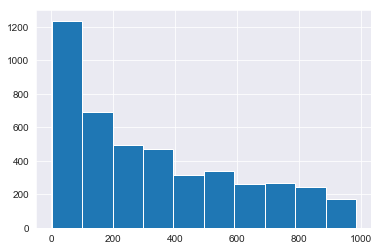

In [75]:
print(no_zero_training_cols['GHI'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


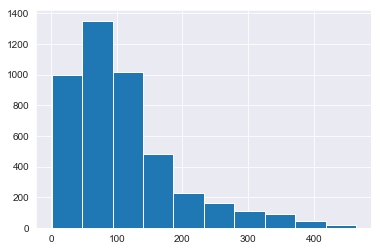

In [76]:
print(no_zero_training_cols['DHI'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


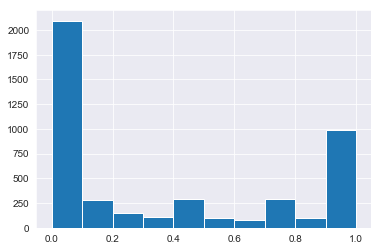

In [77]:
print(no_zero_training_cols['Cloud Cover'].hist())

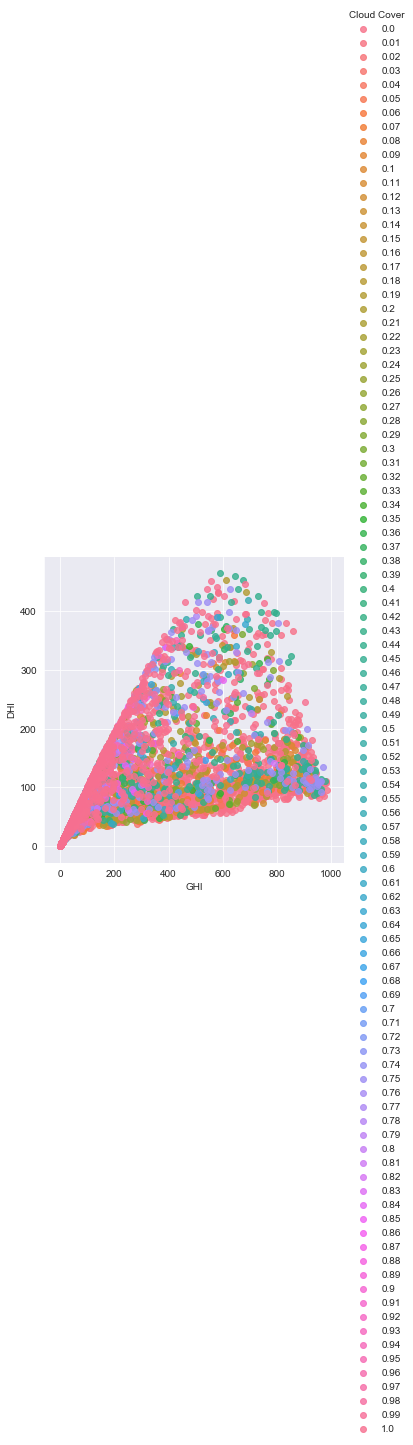

In [78]:
sns.lmplot('GHI', 'DHI', data=no_zero_training_cols, hue='Cloud Cover', fit_reg=False)
plt.show()

In [115]:
#GEt data from pandas
feature_cols = ['GHI', 'Cloud Cover']
target_col = 'DHI'




#Lets fit a new model with no zeros
model_no_zero = mlr()
model_no_zero.fit_dataframe(X=feature_cols, y=target_col, dataframe=no_zero_training_cols)

In [116]:
print ("R-squared: ",model_no_zero.r_squared())
print ("Adjusted R-squared: ",model_no_zero.adj_r_squared())
print("MSE: ",model_no_zero.mse())

R-squared:  0.2908336105656335
Adjusted R-squared:  0.290517793870272
MSE:  4984.823589648113


In [117]:
model_no_zero.print_metrics()

sse:     22401797.2119
sst:     31588915.5854
mse:     4984.8236
r^2:     0.2908
adj_r^2: 0.2905
AIC:     51022.0244
BIC:     51041.2559


In [118]:
#This is not good, errors are much much larger

In [119]:
test_df_no_zero = test_df.loc[test_df['DHI']!= 0 ]
print(test_df_no_zero)
a = list(test_df_no_zero['GHI'].values)
b = list(test_df_no_zero['Cloud Cover'].values)
test_input_no_zero = list(zip(a, b))
test_input_no_zero = np.array(test_input_no_zero)

NameError: name 'test_df' is not defined

In [108]:
predictions_no_zero = model_no_zero.predict(test_input_no_zero)

In [109]:
print(len(predictions_no_zero))

4347


In [110]:
actuals_no_zero = test_df_no_zero['DHI']
MAE = metrics.mean_absolute_error(actuals_no_zero, predictions_no_zero)
MSE = metrics.mean_squared_error(actuals_no_zero, predictions_no_zero)
r2 = metrics.r2_score(actuals_no_zero, predictions_no_zero)
print("MAE is: ", MAE)
print("MSE is ", MSE)
print("r2 is: ",r2)


MAE is:  62.97143223416007
MSE is  7409.275219985294
r2 is:  0.21293662382417533


In [111]:
#

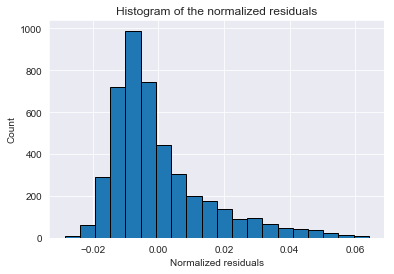

In [112]:
model_no_zero.histogram_resid()

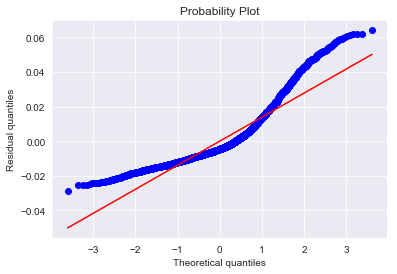

In [113]:
model_no_zero.qqplot_resid()

In [114]:
print("P-values:",model_no_zero.pvalues())
print("t-test values:",model_no_zero.tvalues())
print("Standard errors:",model_no_zero.std_err())

P-values: [1.33520266e-099 3.45856362e-279 2.09070420e-025]
t-test values: [21.72588165 38.39614492 10.48005152]
Standard errors: [2.15422848 0.0039989  2.69863256]


In [115]:
#This model fits much worse

In [116]:
#Maybe log transform the non zero

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


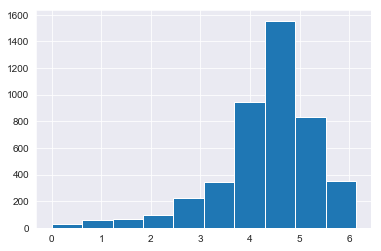

In [82]:
no_zero_training_cols['DHI_log'] = np.log(no_zero_training_cols['DHI'])
no_zero_training_cols['GHI_log'] = np.log(no_zero_training_cols['GHI'])
# no_zero_training_cols['Cloud_Cover_log'] = np.log(no_zero_training_cols['Cloud Cover'])


print(no_zero_training_cols['DHI_log'].hist())


                                          

AxesSubplot(0.125,0.125;0.775x0.755)


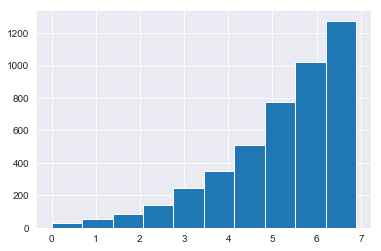

In [83]:
print(no_zero_training_cols['GHI_log'].hist())

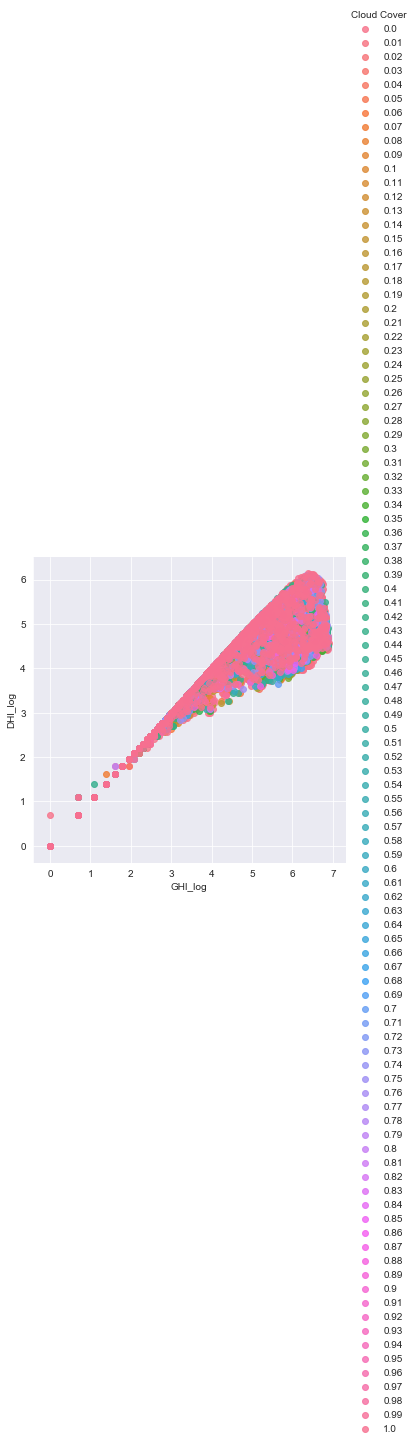

In [119]:
sns.lmplot('GHI_log', 'DHI_log', data=no_zero_training_cols, hue='Cloud Cover', fit_reg=False)
plt.show()

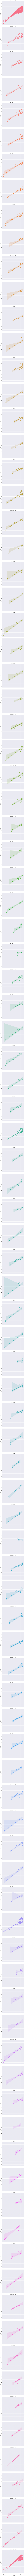

In [120]:
sns.lmplot('GHI_log', 'DHI_log', data=no_zero_training_cols, hue='Cloud Cover', row='Cloud Cover', fit_reg=True)
plt.show()

In [111]:
#This is actually starting to look good. Cloud Cover points are already 0-1 so dont transform


In [120]:
#GEt data from pandas
feature_cols = ['GHI_log', 'Cloud Cover']
target_col = 'DHI_log'


#Lets fit a new model with no zeros
model_no_zero_log = mlr()
model_no_zero_log.fit_dataframe(X=feature_cols, y=target_col, dataframe=no_zero_training_cols)

In [121]:
model_no_zero_log.print_metrics()

sse:     1004.2728
sst:     4605.3466
mse:     0.2235
r^2:     0.7819
adj_r^2: 0.7818
AIC:     6025.2529
BIC:     6044.4844


In [122]:
#This looks like it could fit pretty well. Very good adjusted R^2

In [123]:
print("P-values:",model_no_zero_log.pvalues())
print("t-test values:",model_no_zero_log.tvalues())
print("Standard errors:",model_no_zero_log.std_err())

P-values: [6.63441951e-096 0.00000000e+000 9.71758254e-228]
t-test values: [ 21.29034633 126.85496182  34.17515071]
Standard errors: [0.03063147 0.00523779 0.01801373]


In [133]:
temparr1 = no_zero_training_cols['GHI_log'].values
temparr2 = no_zero_training_cols['Cloud Cover'].values
temparr3 = np.array(list(zip(temparr1, temparr2)))
print(temparr3.shape)

(4494, 2)


In [137]:
predictions_no_zero_log = model_no_zero_log.predict(temparr3)

In [140]:
actuals_no_zero_log = no_zero_training_cols['DHI_log']

MAE = metrics.mean_absolute_error(actuals_no_zero_log, predictions_no_zero_log)
MSE = metrics.mean_squared_error(actuals_no_zero_log, predictions_no_zero_log)
r2 = metrics.r2_score(actuals_no_zero_log, predictions_no_zero_log)
print("MAE is: ", MAE)
print("MSE is ", MSE)
print("r2 is: ",r2)
print("MAPE is ", np.mean(np.abs((actuals_no_zero_log - predictions_no_zero_log) / actuals_no_zero_log)) * 100)

MAE is:  0.3911527641727589
MSE is  0.22346969746790304
r2 is:  0.7819332807628061
MAPE is  inf


In [141]:
actuals = no_zero_training_cols['DHI']
predictions_log_backtransform = np.exp(predictions_no_zero_log)

MAE = metrics.mean_absolute_error(actuals, predictions_log_backtransform)
MSE = metrics.mean_squared_error(actuals, predictions_log_backtransform)
r2 = metrics.r2_score(actuals, predictions_log_backtransform)
print("MAE is: ", MAE)
print("MSE is ", MSE)
print("r2 is: ",r2)
print("MAPE is ", np.mean(np.abs((actuals - predictions_log_backtransform) / actuals)) * 100)

MAE is:  45.0111376117102
MSE is  4418.768115441343
r2 is:  0.37136354500431856
MAPE is  41.487739514642946


In [124]:
test_df_no_zero['DHI_log'] = np.log(test_df_no_zero['DHI'])
test_df_no_zero['GHI_log'] = np.log(test_df_no_zero['GHI'])
test_df_no_zero['Cloud_Cover_log'] = np.log(test_df_no_zero['Cloud Cover'])
print(test_df_no_zero['GHI_log'])

NameError: name 'test_df_no_zero' is not defined

In [127]:
print(test_df_no_zero)
a = list(test_df_no_zero['GHI_log'].values)
b = list(test_df_no_zero['Cloud Cover'].values)
test_input_no_zero_log = list(zip(a, b))
test_input_no_zero_log = np.array(test_input_no_zero_log)

      Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
14    2015      1    1    14      30           -8            14           288   
15    2015      1    1    15      30           -6            41           651   
16    2015      1    1    16      30           -3            58           784   
17    2015      1    1    17      30           -1            68           842   
18    2015      1    1    18      30            0            73           860   
...    ...    ...  ...   ...     ...          ...           ...           ...   
8754  2015     12   31    18      30           -3            93           816   
8755  2015     12   31    19      30           -3            91           806   
8756  2015     12   31    20      30           -3            79           762   
8757  2015     12   31    21      30           -3            60           660   
8758  2015     12   31    22      30           -5            30           410   

      Clearsky GHI  Cloud T

In [128]:
predictions_no_zero_log = model_no_zero_log.predict(test_input_no_zero_log)

In [129]:
print(len(predictions_no_zero_log))

4347


In [130]:
actuals_no_zero_log = test_df_no_zero['DHI_log']
MAE = metrics.mean_absolute_error(actuals_no_zero_log, predictions_no_zero_log)
MSE = metrics.mean_squared_error(actuals_no_zero_log, predictions_no_zero_log)
r2 = metrics.r2_score(actuals_no_zero_log, predictions_no_zero_log)
print("MAE is: ", MAE)
print("MSE is ", MSE)
print("r2 is: ",r2)


MAE is:  0.45829196520928167
MSE is  0.28480181567861224
r2 is:  0.6487305385603894


In [131]:
#try polynomial fit, in scikit learn
#svr 

In [132]:
#try only with log transforming responseonly,

feature_cols = ['GHI', 'Cloud Cover']
target_col = 'DHI_log'


model_no_zero_log_ver2 = mlr()
model_no_zero_log_ver2.fit_dataframe(X=feature_cols, y=target_col, dataframe=no_zero_training_cols)
model_no_zero_log_ver2.print_metrics()

sse:     3068.6513
sst:     4605.3466
mse:     0.6828
r^2:     0.3337
adj_r^2: 0.3334
AIC:     11044.9359
BIC:     11064.1674


In [133]:
# sse:     1174.2231
# sst:     4605.3466
# mse:     0.2613
# r^2:     0.7450
# adj_r^2: 0.7449
# AIC:     6727.8583
# BIC:     6747.0898


#OKAY THIS DIDNT WORK BACK TO SQUARE ONE

In [134]:
actuals_no_zero_log = test_df_no_zero['DHI']
predictions_log_backtransform = np.exp(predictions_no_zero_log)

print(predictions_log_backtransform)
print(len(predictions_log_backtransform))


MAE = metrics.mean_absolute_error(actuals_no_zero_log, predictions_log_backtransform)
MSE = metrics.mean_squared_error(actuals_no_zero_log, predictions_log_backtransform)
r2 = metrics.r2_score(actuals_no_zero_log, predictions_log_backtransform)
print("MAE is: ", MAE)
print("MSE is ", MSE)
print("r2 is: ",r2)

[  6.9500097   60.09921952  17.12043504 ... 123.84585527 101.8285331
  49.96431184]
4347
MAE is:  58.9733000325575
MSE is  7044.606478598024
r2 is:  0.2516742064163121


In [135]:
#hmm log transform does much much much better when both variables are log transformed

## Polynomial regression on log transformed


In [84]:
#Lets check the graphs

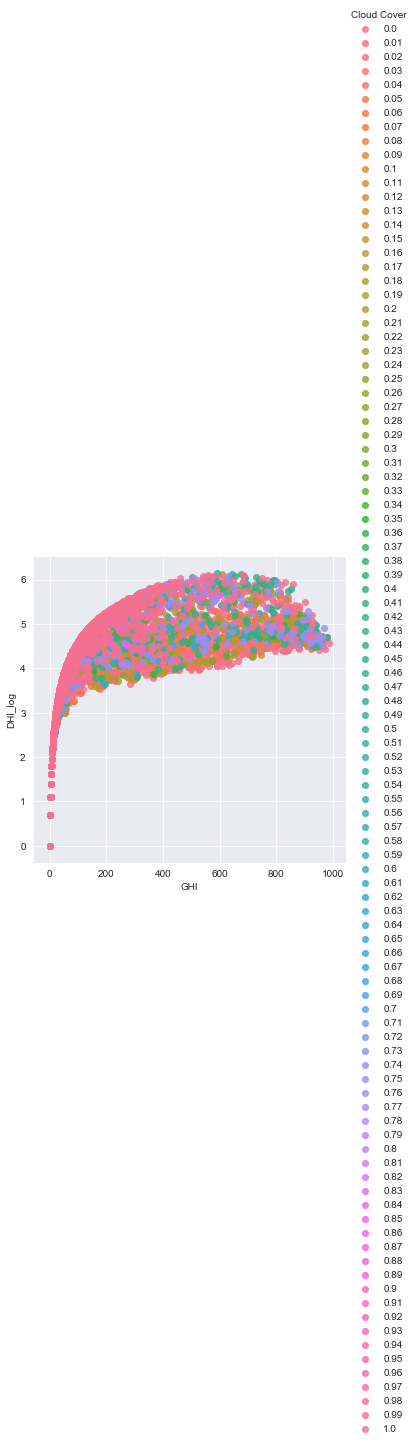

In [85]:
sns.lmplot('GHI', 'DHI_log', data=no_zero_training_cols, hue='Cloud Cover', fit_reg=False)
plt.show()

In [86]:
#hmmmmmmmmmmmm, polynomial fit here looks like it would work

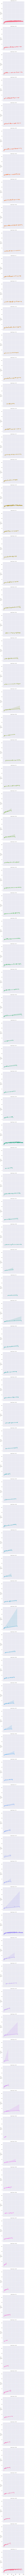

In [87]:
sns.lmplot('GHI', 'DHI_log', data=no_zero_training_cols, hue='Cloud Cover', row='Cloud Cover', fit_reg=True)
plt.show()

In [88]:
#Lets fit a polynomial regression on this log transformed response

In [89]:
#try polynomial fit, in scikit learn


In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [91]:
#Need to fit some poly stuff

#first create X feature vector of [GHI, Cloud Cover]
_GHI = no_zero_training_cols['GHI'].values
_Cloud_Cover = no_zero_training_cols['Cloud Cover'].values
_X = np.array(list(zip(_GHI, _Cloud_Cover)))
print(_X)
print(len(_X))
print(_X[0][1])

[[ 14.     0.  ]
 [106.     0.  ]
 [274.     0.  ]
 ...
 [257.     0.55]
 [154.     0.53]
 [ 50.     0.49]]
4494
0.0


In [92]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(_X)
print(len(X_poly))

4494


In [101]:
actuals_log = no_zero_training_cols['DHI_log'].values
print(actuals_log)
print(len(actuals_log))

[2.48490665 3.97029191 4.09434456 ... 4.48863637 4.2341065  3.49650756]
4494


In [94]:
clf_poly = linear_model.LinearRegression()
clf_poly.fit(X_poly, actuals)
predictions_poly = clf_poly.predict(X_poly)

In [95]:
print(predictions_poly)
print(len(predictions_poly))

[2.27531089 4.15975444 4.46867725 ... 4.98187501 4.83872369 3.47082134]
4494


In [96]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error


In [143]:
rmse = np.sqrt(mean_squared_error(actuals_log,predictions_poly))
r2 = r2_score(actuals_log,predictions_poly)
print("rmse is ", rmse)
print("r2 is ",r2)
print("mean absolute error is ",mean_absolute_error(actuals_log,predictions_poly))
print("mean squared log error is ", mean_squared_log_error(actuals_log, predictions_poly))
print("MAPE is ", np.mean(np.abs((actuals_log - exp_preds) / actuals_log)) * 100)

rmse is  0.46222186437373625
r2 is  0.7915164859263261
mean absolute error is  0.3582059774970237
mean squared log error is  0.015289771281083345
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [98]:
exp_preds = np.exp(predictions_poly)
actuals = no_zero_training_cols['DHI'].values
rmse = np.sqrt(mean_squared_error(actuals,exp_preds))
r2 = r2_score(actuals,exp_preds)

print("rmse is ", rmse)
print("r2 is ",r2)
print("mean absolute error is ",mean_absolute_error(actuals,exp_preds))
# print("mean squared log error is ", mean_squared_log_error(actuals, predictions_poly))
print("MAPE is ", np.mean(np.abs((actuals - exp_preds) / actuals)) * 100)

rmse is  60.98840789091907
r2 is  0.47083276802545704
mean absolute error is  38.289764529142836
MAPE is  40.11058215987512


In [99]:
#Not bad, lets check the chart, 75 r^2 w/ 5 degree polynomial
import matplotlib.pyplot as plt


In [100]:
print(X_poly[0])

[1.00000e+00 1.40000e+01 0.00000e+00 1.96000e+02 0.00000e+00 0.00000e+00
 2.74400e+03 0.00000e+00 0.00000e+00 0.00000e+00 3.84160e+04 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 5.37824e+05 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00]


4494 4494 4494


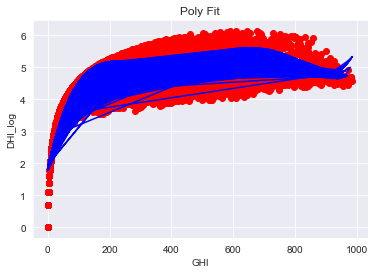

In [103]:
print(len(X_poly), len(actuals_log), len(predictions_poly))
def viz_linear():
    plt.scatter(_GHI, actuals_log, color='red')
    plt.plot(_GHI, predictions_poly, color='blue')
    plt.title('Poly Fit')
    plt.xlabel('GHI')
    plt.ylabel('DHI_log')
    plt.show()
    return
viz_linear()

In [287]:
#tbh log transformed with ols regression seems to work better

In [104]:
# rmse is  0.4988520669363634
# r2 is  0.7571633121421735
# mean absolute error is  0.3985941450954214
# mean squared log error is  0.016357690299577118

print(np.exp(0.3985941450954214))

1.489728882124767


In [105]:
#try polynomial fit on original, non-log transformed

In [106]:
poly2 = PolynomialFeatures(degree=5)
X_poly = poly2.fit_transform(_X)
print(len(X_poly))

actuals = no_zero_training_cols['DHI'].values


clf_poly_original = linear_model.LinearRegression()
clf_poly_original.fit(X_poly, actuals)
predictions_poly_original = clf_poly_original.predict(X_poly)

4494


In [107]:
rmse = np.sqrt(mean_squared_error(actuals,predictions_poly_original))
r2 = r2_score(actuals,predictions_poly_original)
print("rmse is ", rmse)
print("r2 is ",r2)
print("mean absolute error is ",mean_absolute_error(actuals,predictions_poly_original))
# print("mean squared log error is ", mean_squared_log_error(actuals, predictions_poly_original))

rmse is  58.3816089838984
r2 is  0.5151019132350041
mean absolute error is  38.28923925165169


In [109]:
print("MAPE is ", np.mean(np.abs((actuals - predictions_poly_original) / actuals)) * 100)

MAPE is  40.197237058608934


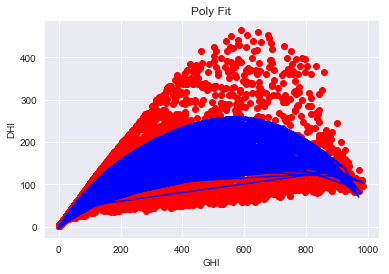

In [110]:
def viz_linear():
    plt.scatter(_GHI, actuals, color='red')
    plt.plot(_GHI, predictions_poly_original, color='blue')
    plt.title('Poly Fit')
    plt.xlabel('GHI')
    plt.ylabel('DHI')
    plt.show()
    return
viz_linear()

In [307]:
# Current model Rankings


In [308]:
"""
1. Log- Log transformation with OLS
2. 1. Log Transformation of response with polynomial regression
3. Polynomial in non log transformed


"""

'\n1. Log Transformation of response with polynomial regression\n\n2. Log- Log transformation with OLS\n\n\n'